# 1. Import Assets

In [ ]:
import yfinance as yf
import numpy as np
import pandas as df

# 2. Download Stocks Data

In [3]:
# Download dat of the S&P 500 (ticker: GSPC)
df = yf.download('^GSPC', start='2010-10-01')

[*********************100%***********************]  1 of 1 completed


In [5]:
# create a column with the daily retuns
df['return'] = (np
.log(
    df['Close'].pct_change()
    + 1)
)

In [11]:
def lagit(df, lags):
    names = []
    for i in range(1, lags + 1):
        df['Lag_'+str(i)] = df['return'].shift(i)
        names.append('Lag_'+str(i))
    return names

In [12]:
 lagnames = lagit(df, 5)

In [13]:
lagnames

['Lag_1', 'Lag_2', 'Lag_3', 'Lag_4', 'Lag_5']

In [14]:
df.head()

,Open,High,Low,Close,Adj Close,Volume,return,Lag_1,Lag_2,Lag_3,Lag_4,Lag_5
Date,,,,,,,,,,,,
2010-10-01,1143.489990,1150.300049,1139.420044,1146.239990,1146.239990,4298910000,NaN,NaN,NaN,NaN,NaN,NaN
2010-10-04,1144.959961,1148.160034,1131.869995,1137.030029,1137.030029,3604110000,-0.008067,NaN,NaN,NaN,NaN,NaN
2010-10-05,1140.680054,1162.760010,1140.680054,1160.750000,1160.750000,4068840000,0.020647,-0.008067,NaN,NaN,NaN,NaN
2010-10-06,1159.810059,1162.329956,1154.849976,1159.969971,1159.969971,4073160000,-0.000672,0.020647,-0.008067,NaN,NaN,NaN
2010-10-07,1161.569946,1163.869995,1151.410034,1158.060059,1158.060059,3910550000,-0.001648,-0.000672,0.020647,-0.008067,NaN,NaN


In [15]:
df.dropna(inplace=True)

In [16]:
from sklearn.linear_model import  LinearRegression

In [17]:
model = LinearRegression()

In [18]:
model.fit(df[lagnames], df['return'])

LinearRegression()

In [19]:
df['prediction_LR'] = model.predict(df[lagnames])

In [20]:
df.head()

,Open,High,Low,Close,Adj Close,Volume,return,Lag_1,Lag_2,Lag_3,Lag_4,Lag_5,prediction_LR
Date,,,,,,,,,,,,,
2010-10-11,1165.319946,1168.680054,1162.020020,1165.319946,1165.319946,2505900000,0.000146,0.006104,-0.001648,-0.000672,0.020647,-0.008067,-0.001498
2010-10-12,1164.280029,1172.579956,1155.709961,1169.770020,1169.770020,4076170000,0.003811,0.000146,0.006104,-0.001648,-0.000672,0.020647,0.000920
2010-10-13,1171.319946,1184.380005,1171.319946,1178.099976,1178.099976,4969410000,0.007096,0.003811,0.000146,0.006104,-0.001648,-0.000672,-0.000048
2010-10-14,1177.819946,1178.890015,1166.709961,1173.810059,1173.810059,4969410000,-0.003648,0.007096,0.003811,0.000146,0.006104,-0.001648,-0.000470
2010-10-15,1177.469971,1181.199951,1167.119995,1176.189941,1176.189941,5724910000,0.002025,-0.003648,0.007096,0.003811,0.000146,0.006104,0.001269


In [21]:
# if predction is > 0 we want to buy
# if < 0 we want to sell

df['direction_LR'] = [1 if i > 0 else -1 for i in df['prediction_LR']]

In [23]:
df['strategy_LR'] = df['direction_LR'] * df['return']

In [27]:
np.exp(df[['return', 'strategy_LR']].sum())

return         3.779170
strategy_LR    7.260097
dtype: float64

<AxesSubplot:xlabel='Date'>

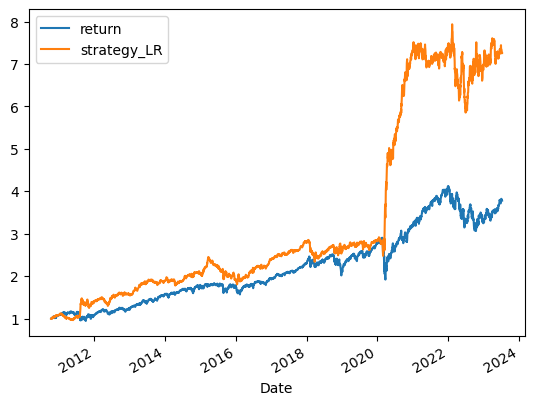

In [28]:
np.exp(df[['return', 'strategy_LR']].cumsum()).plot()